# Python For Finance

This workshop uses the **Investor Exchange API, and the Pandas & Matplotlib** Python libraries.

This workshop is an adaptation of the posts by Gerogios Efstathopoulos and can be found here: https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## Quick review of Python Lists and Dictionaries

Before we dive into Python Pandas, here's a quick review of Lists and Dictionaries which will come in handy.

#### Lists
Lists in Python are a mutable (i.e. can change) fundamental data type, denoted by `[]` and consist of a series of any Python data types such as strings, integers, or even other lists and dictionaries. Items in a list can be repeated.

Lists are indexed starting from 0 which means the first item in say a list called `my_list` can be accessed with `my_list[0]`.

In [26]:
fruits = ['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']
fruits

['orange', 'apple', 'pear', 'banana', 'kiwi', 'apple', 'banana']

In [4]:
fruits.count('apple')

2

In [5]:
len(fruits)

7

In [6]:
fruits[0]

'orange'

In [8]:
fruits[-1]

'banana'

In [25]:
fruits.append('grape')
fruits

['orange',
 'apple',
 'pear',
 'banana',
 'apple',
 'banana',
 'grape',
 'grape',
 ['strawberry', 'watermelon'],
 'strawberry',
 'watermelon',
 'strawberry',
 'watermelon',
 'grape']

In [24]:
fruits.remove('kiwi')
fruits

ValueError: list.remove(x): x not in list

In [23]:
fruits.extend(['strawberry', 'watermelon']) # Note this takes in an iterable such as a list to add to an existing list
fruits

['orange',
 'apple',
 'pear',
 'banana',
 'apple',
 'banana',
 'grape',
 'grape',
 ['strawberry', 'watermelon'],
 'strawberry',
 'watermelon',
 'strawberry',
 'watermelon']

In [19]:
fruits[len(fruits)-1]

'watermelon'

#### Dictionaries
Dictionaries in Python are also a mutable (i.e. can change) fundamental data type, denoted by `{}` and consist of **key:value pairs**. The keys must be unique in a dictionary. 

The main operations on a dictionary are storing a value with some key and extracting the value given the key.

Performing `list(your_dictionary)` on a dictionary returns a list of all the keys used in the dictionary.

To check whether a single key is in the dictionary, use the `in`keyword.

In [22]:
my_phone_ext = {
    "jack": 4098,
    "jill": 4022,
    "teddy": 4011
}

my_phone_ext

{'jack': 4098, 'jill': 4022, 'teddy': 4011}

In [27]:
my_phone_ext["jack"]

4098

In [28]:
list(my_phone_ext)

['jack', 'jill', 'teddy']

In [29]:
my_phone_ext["tom"] = 4001
my_phone_ext

{'jack': 4098, 'jill': 4022, 'teddy': 4011, 'tom': 4001}

In [30]:
my_phone_ext["jack"] = 4091
my_phone_ext

{'jack': 4091, 'jill': 4022, 'teddy': 4011, 'tom': 4001}

In [32]:
sorted(my_phone_ext)

['jack', 'jill', 'teddy', 'tom']

In [33]:
'jill' in my_phone_ext

True

In [34]:
'don' in my_phone_ext

False

## Introduction to Pandas

The Pandas Library stands for *Python Data Analysis Library* and is an easy-to-use, open source tool for analysing data.

Pandas takes tabular data, like in an Excel/CSV spreadsheet, and creates a Python object consisting of rows and columns called a **dataframe**, which then comes with a handful of useful functions or actions to manipulate that Python object. 

For a short 10min tutorial on Pandas, see https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

We will go through a few key Pandas items here.

#### Using Pandas
By convention we import Pandas, along with another helpful library called Numpy, as follows:

In [35]:
import numpy as np
import pandas as pd

The Pandas library is now accessible to us as the `pd` variable.

Now we create a **DataFrame** consisting of indicies (i.e. the row labels), columns and our data. The syntax for creating a DataFrame is:

`my_data_frame = pd.DataFrame(<your data>, index=<your row labels>, columns = <your column labels>)`

In [36]:
dates = pd.date_range('20200101', periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [37]:
data = np.random.rand(6,4) # creates a 6 x 4 matrix of random numbers between 0 and 1
data

array([[0.63861192, 0.22575064, 0.84683953, 0.58011599],
       [0.40927766, 0.38821355, 0.55535386, 0.59886038],
       [0.86808682, 0.18190544, 0.55492532, 0.91946443],
       [0.18593173, 0.14633902, 0.39076895, 0.55866087],
       [0.76469037, 0.03771219, 0.94072591, 0.28365453],
       [0.20954656, 0.53240321, 0.23626118, 0.40750953]])

In [38]:
column_labels = ['A', 'B', 'C', 'D']

In [39]:
df = pd.DataFrame(data, index=dates, columns=column_labels)
df

,A,B,C,D
2020-01-01,0.638612,0.225751,0.846840,0.580116
2020-01-02,0.409278,0.388214,0.555354,0.598860
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-04,0.185932,0.146339,0.390769,0.558661
2020-01-05,0.764690,0.037712,0.940726,0.283655
2020-01-06,0.209547,0.532403,0.236261,0.407510


Now let us look at how we can interact with this dataframe using some built-in methods:

In [41]:
df.head() # Gives us just the top 5 rows of our dataframe by default

,A,B,C,D
2020-01-01,0.638612,0.225751,0.846840,0.580116
2020-01-02,0.409278,0.388214,0.555354,0.598860
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-04,0.185932,0.146339,0.390769,0.558661
2020-01-05,0.764690,0.037712,0.940726,0.283655


In [43]:
df.tail(3) # Gives us the bottom 3 rows of our dataframe since we've specified the number

,A,B,C,D
2020-01-04,0.185932,0.146339,0.390769,0.558661
2020-01-05,0.764690,0.037712,0.940726,0.283655
2020-01-06,0.209547,0.532403,0.236261,0.407510


In [45]:
df.describe() # Gives us a nice summary table of the data

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.512691,0.252054,0.587479,0.558044
std,0.288107,0.178810,0.266905,0.214815
min,0.185932,0.037712,0.236261,0.283655
25%,0.259479,0.155231,0.431808,0.445297
50%,0.523945,0.203828,0.555140,0.569388
75%,0.733171,0.347598,0.773968,0.594174
max,0.868087,0.532403,0.940726,0.919464


In [46]:
df.sort_values(by='B') # Sort by a specific column

,A,B,C,D
2020-01-05,0.764690,0.037712,0.940726,0.283655
2020-01-04,0.185932,0.146339,0.390769,0.558661
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-01,0.638612,0.225751,0.846840,0.580116
2020-01-02,0.409278,0.388214,0.555354,0.598860
2020-01-06,0.209547,0.532403,0.236261,0.407510


In [48]:
df.sort_index(axis=1, ascending=False) # axis=0 for rows, axis=1 for columns, sorts DataFrame by labels along an axis

,D,C,B,A
2020-01-01,0.580116,0.846840,0.225751,0.638612
2020-01-02,0.598860,0.555354,0.388214,0.409278
2020-01-03,0.919464,0.554925,0.181905,0.868087
2020-01-04,0.558661,0.390769,0.146339,0.185932
2020-01-05,0.283655,0.940726,0.037712,0.764690
2020-01-06,0.407510,0.236261,0.532403,0.209547


In [64]:
df['B'] # Selects a single column

2020-01-01    0.225751
2020-01-02    0.388214
2020-01-03    0.181905
2020-01-04    0.146339
2020-01-05    0.037712
2020-01-06    0.532403
Freq: D, Name: B, dtype: float64

In [66]:
df.B # Also the same thing as df['B']

2020-01-01    0.225751
2020-01-02    0.388214
2020-01-03    0.181905
2020-01-04    0.146339
2020-01-05    0.037712
2020-01-06    0.532403
Freq: D, Name: B, dtype: float64

In [67]:
df.loc['2020-01-05'] # Selects a specific row by label

A    0.764690
B    0.037712
C    0.940726
D    0.283655
Name: 2020-01-05 00:00:00, dtype: float64

In [68]:
df[1:4] # Slices the dataframe by rows using default index values. Note the last index number in the selected range is excluded.

,A,B,C,D
2020-01-02,0.409278,0.388214,0.555354,0.598860
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-04,0.185932,0.146339,0.390769,0.558661


In [69]:
df[df.A > 0.5] # Boolean indexing based on a condition. df.A refers to column A

,A,B,C,D
2020-01-01,0.638612,0.225751,0.846840,0.580116
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-05,0.764690,0.037712,0.940726,0.283655


In [71]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2020-01-01,0.638612,0.225751,0.846840,0.580116,one
2020-01-02,0.409278,0.388214,0.555354,0.598860,one
2020-01-03,0.868087,0.181905,0.554925,0.919464,two
2020-01-04,0.185932,0.146339,0.390769,0.558661,three
2020-01-05,0.764690,0.037712,0.940726,0.283655,four
2020-01-06,0.209547,0.532403,0.236261,0.407510,three


In [74]:
df2[df2['E'].isin(['one'])]

,A,B,C,D,E
2020-01-01,0.638612,0.225751,0.846840,0.580116,one
2020-01-02,0.409278,0.388214,0.555354,0.598860,one


In [76]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2020-01-03,0.868087,0.181905,0.554925,0.919464,two
2020-01-05,0.764690,0.037712,0.940726,0.283655,four


Now let us look at a basic Python plotting library to create charts from our data. **Matplotlib** is an easy-to-use but powerful plotting library.

## Introduction to Matplotlib

For a detailed tutorial on Matplotlib, see: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

Here are some examples of the basics with Matplotlib:

By convention, we import Matplotlib as follows:

In [77]:
import matplotlib.pyplot as plt

The `plt` object has a `plot()` method which uses the convention: `plt.plot(<x-axis data>, <y-axis data>, <plot style>)`.

 If you provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you, starting with 0.
 
 So for example:

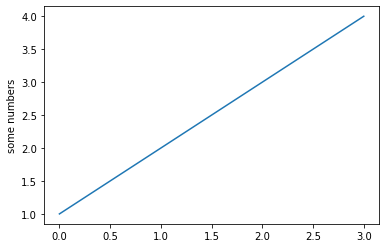

In [78]:
plt.plot([1, 2, 3, 4]) # No x-axis data here, only y-axis
plt.ylabel('some numbers')
plt.show() # This actually displays the plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue `'ro'`

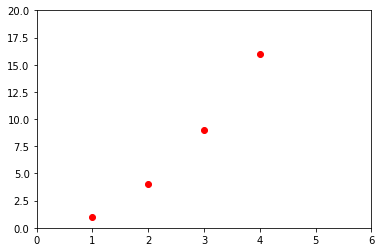

In [79]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Text(0.5, 0.98, 'My beautiful graph')

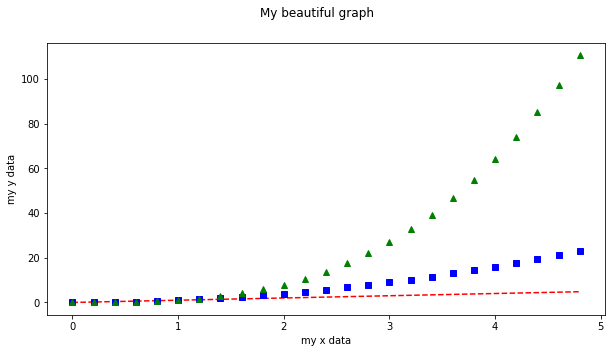

In [29]:
t = np.arange(0., 5., 0.2) # evenly sampled time data at 200ms intervals

plt.figure(figsize=(10, 5))
plt.plot(t,t,'r--')
plt.plot(t,t**2, 'bs')
plt.plot(t,t**3, 'g^')
plt.xlabel('my x data')
plt.ylabel('my y data')
plt.suptitle('My beautiful graph')

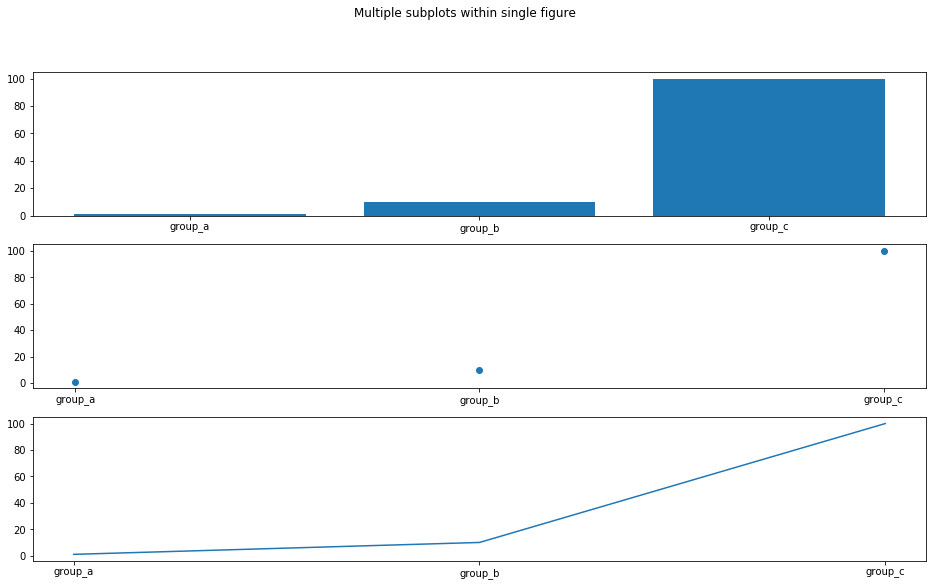

In [31]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(16, 9))

plt.subplot(311)
plt.bar(names, values)
plt.subplot(312)
plt.scatter(names, values)
plt.subplot(313)
plt.plot(names, values)
plt.suptitle('Multiple subplots within single figure')
plt.show()

## Analysing Stock Ticker Data

Now that we have some of the Python data manipulation and plotting fundamentals down, let us start to analyze timeseries financial data.

### Setting up Investor Exchange Account
Investors Exchange (IEX) at https://iexcloud.io/ offers a free web-based API to access financial data such as historical and current stock ticker information. You will need to setup an account (which requires an email validation) in order to obtain an API Key which we will use in our Python code.

Sign-up Process:
* When you sign-up, you will receive an email with the subject `IEX Cloud Email Verification`
* Verify your email and then click on the link provided under: `To get access to your API keys, go to the link below` . This will log you back into the IEX console.
* Then in the left-hand menu, click on `API Tokens`
* Your API token will be the `Publishable` type

### Python Requirements

In addition to `pandas` and `matplotlib` packages, we will need to install the following Python package: 
* pandas-datareader

In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


### Pulling in stock ticker data
First, we import the following packages:

In [4]:
from pandas import Series, DataFrame
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Then we will set our IEX API KEY to the environment variable "IEX_API_KEY".

Copy your API Token public key from the IEX console and paste it as follows:

In [8]:
os.environ["IEX_API_KEY"] = "pk_45b14986dc844348a4f4d6bbd54d4871"

Now, let's create a small **list of tickers** that we want to analyze. We can scale up with more stocks but we will start with just 3 for now. Let's also look at stock ticker data since the beginning of 2018. 

In [6]:
tickers = ['AAPL', 'AMZN', 'MSFT']

start_date = '2018-01-01'
end_date = '2020-01-01'

Now we pull in the ticker data with pandas's `datareader` with:

In [9]:
stock_data = data.DataReader(tickers, 'iex', start_date, end_date)

In [10]:
stock_data

Attributes    open                     high                      low           \
Symbols       AAPL     AMZN    MSFT    AAPL     AMZN    MSFT    AAPL     AMZN   
date                                                                            
2018-01-02  170.16  1172.00   86.13  172.30  1190.00   86.31  169.26  1170.51   
2018-01-03  172.53  1188.30   86.06  174.55  1205.49   86.51  171.96  1188.30   
2018-01-04  172.54  1205.00   86.59  173.47  1215.87   87.66  172.08  1204.66   
2018-01-05  173.44  1217.51   87.66  175.37  1229.14   88.41  173.05  1210.00   
2018-01-08  174.35  1236.00   88.20  175.61  1253.08   88.58  173.93  1232.03   
...            ...      ...     ...     ...      ...     ...     ...      ...   
2019-12-24  284.69  1793.81  157.48  284.89  1795.57  157.71  282.92  1787.58   
2019-12-26  284.82  1801.01  157.56  289.98  1870.46  158.73  284.70  1799.50   
2019-12-27  291.12  1882.92  159.45  293.97  1901.40  159.55  288.12  1866.01   
2019-12-30  289.46  1874.00  158.99  292.69  1884.00  159.02  285.22  1840.62   
2019-12-31  289.93  1842.00  156.77  293.68  1853.26  157.77  289.52  1832.23   

Attributes           close                     volume                     
Symbols       MSFT    AAPL     AMZN    MSFT      AAPL     AMZN      MSFT  
date                                                                      
2018-01-02   85.50  172.26  1189.01   85.95  25555934  2694494  22483797  
2018-01-03   85.97  172.23  1204.20   86.35  29517899  3108793  26061439  
2018-01-04   86.57  173.03  1209.59   87.11  22434597  3022089  21911974  
2018-01-05   87.43  175.00  1229.14   88.19  23660018  3544743  23407110  
2018-01-08   87.60  174.35  1246.87   88.28  20567766  4279475  22113049  
...            ...     ...      ...     ...       ...      ...       ...  
2019-12-24  157.12  284.27  1789.21  157.38  12119714   881337   8989150  
2019-12-26  157.40  289.91  1868.77  158.67  23334004  6024608  14526927  
2019-12-27  158.22  289.80  1869.80  158.96  36592936  6188754  18414352  
2019-12-30  156.73  291.52  1846.89  157.59  36059614  3677306  16356720  
2019-12-31  156.45  293.65  1847.84  157.70  25247625  2510380  18393383  

[503 rows x 15 columns]

In [11]:
type(stock_data)

pandas.core.frame.DataFrame

We see that the data retrieved from IEX is a DataFrame.
We see we have daily information of the `open`, `high`, `low`, `close`, and `volume` of our selected tickers in each row. 

The index of each row is the date which you can access using the `loc` method:

In [12]:
stock_data.loc['2018-01-02']

Attributes  Symbols
open        AAPL            170.16
            AMZN           1172.00
            MSFT             86.13
high        AAPL            172.30
            AMZN           1190.00
            MSFT             86.31
low         AAPL            169.26
            AMZN           1170.51
            MSFT             85.50
close       AAPL            172.26
            AMZN           1189.01
            MSFT             85.95
volume      AAPL       25555934.00
            AMZN        2694494.00
            MSFT       22483797.00
Name: 2018-01-02, dtype: float64

### Plot stock data
Let's plot only the stock price at **close** for each of our 3 tickers. We will use the `matplotlib` library for creating and viewing the plots.

First, create the `close_data` object:

In [13]:
close_data = stock_data['close']

In [14]:
close_data.describe()

Symbols,AAPL,AMZN,MSFT
count,503.000000,503.000000,503.000000
mean,198.673777,1715.606143,115.737177
std,30.000779,173.092200,18.920582
min,142.190000,1189.010000,85.010000
25%,175.515000,1605.510000,101.130000
50%,192.580000,1750.080000,110.190000
75%,215.475000,1836.135000,135.220000
max,293.650000,2039.510000,158.960000


In [15]:
close_data.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='date', length=503)

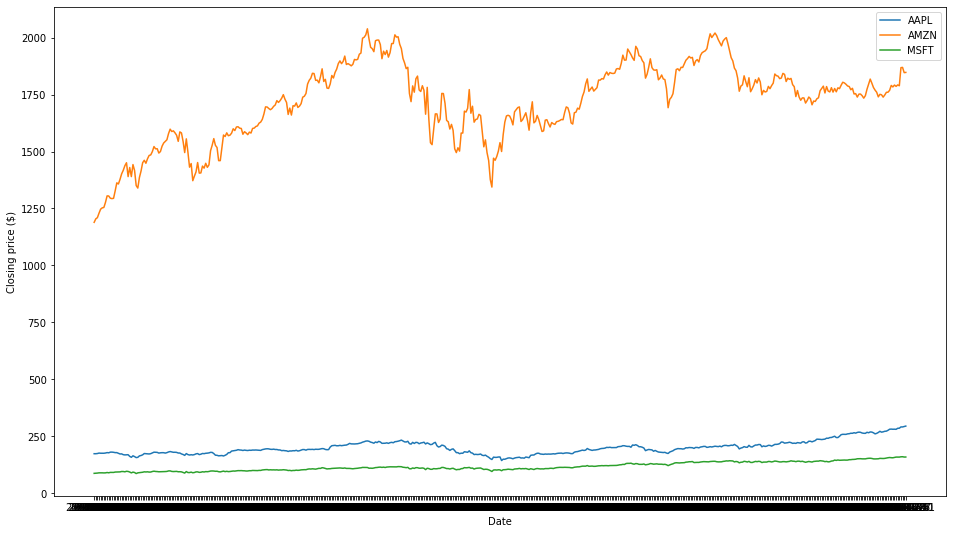

In [16]:
plt.figure(figsize=(16, 9))
plt.plot(close_data.index, close_data['AAPL'], label='AAPL')
plt.plot(close_data.index, close_data['AMZN'], label='AMZN')
plt.plot(close_data.index, close_data['MSFT'], label='MSFT')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()

So while looking at the daily close values for stocks might be interesting, it doesn't tells us much when we are looking at completely different price scales as is the case in the above example. What other timeseries data can we look at?

### Moving averages

Another valuable series to look at is the simple moving average of the stock time-series data over a short and long window. The moving average is just the rolling price average of the past X days and pandas has a built-in `rolling()` function. For a short window, we will use 20 days and for a long window, 100 days. 

Note: creating a moving average means that for a window of $X$ units, the **first $X-1$** units are not valid. For example, if $X = 20\ days$, the data of the first 19 days is used to calculated the average for day 20. Day 21 is calculated using the prices from Day 2 to Day 21.

The reason for introducing the concept of moving averages is that there are trading strategies based on the behaviour of moving averages of differet windows. 

We will do this first for just one of the tickers. Let us use `AMZN`:

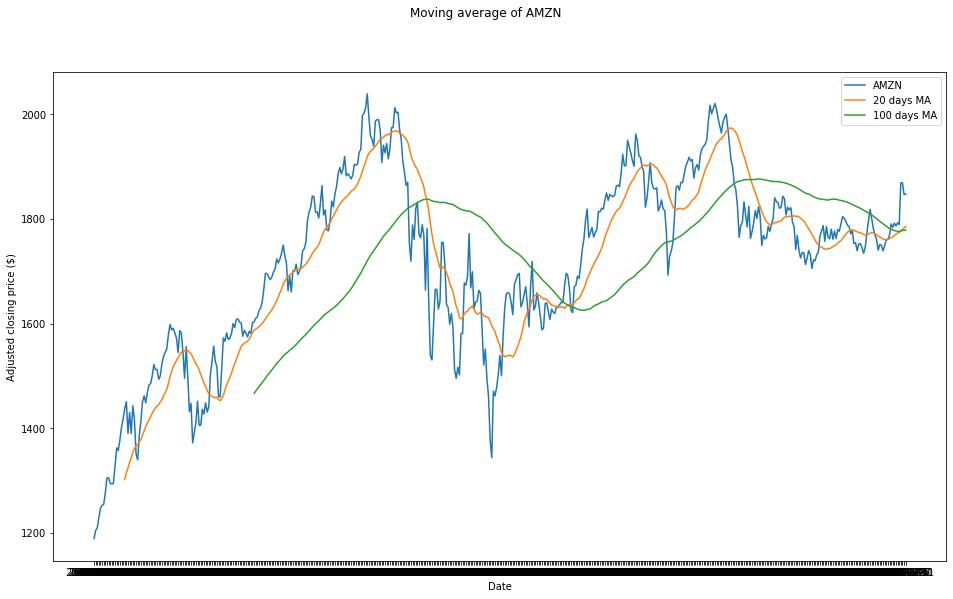

In [18]:
amzn_data = close_data['AMZN']

short_rolling_amzn = amzn_data.rolling(window=20).mean()
long_rolling_amzn = amzn_data.rolling(window=100).mean()

plt.figure(figsize=(16, 9))
plt.plot(amzn_data.index, amzn_data, label='AMZN')
plt.plot(short_rolling_amzn.index, short_rolling_amzn, label='20 days MA')
plt.plot(long_rolling_amzn.index, long_rolling_amzn, label='100 days MA')
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.suptitle('Moving average of AMZN')
plt.legend()
plt.show()

* If you had to create a simple trading strategy based on the moving averages, when would you buy and when would you sell?

* What do the graphs look like for our other 2 stock tickers?

* For an interesting read on which moving average lines are popular and why, check out: https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

Next, we will take a look at a few simple but realistic quantitative trading strategies using Python pandas and the methods discussed above.

## Calculating returns

We will use pandas to calculate the returns of our trading strategies. 

Just looking at the timeseries of price information has some drawbacks. The price of a stock is only positive and so it gets messy if we use models and approaches which require or use negative numbers. Also, looking at price numbers over a long period of time results in statistical properties which are less stable. For example, note the huge standard deviations in the following:

In [19]:
close_data.describe()

Symbols,AAPL,AMZN,MSFT
count,503.000000,503.000000,503.000000
mean,198.673777,1715.606143,115.737177
std,30.000779,173.092200,18.920582
min,142.190000,1189.010000,85.010000
25%,175.515000,1605.510000,101.130000
50%,192.580000,1750.080000,110.190000
75%,215.475000,1836.135000,135.220000
max,293.650000,2039.510000,158.960000


An alternative approach is to look at the timeseries of the changes or delta in the price vs. the timeseries of the price itself. The most common delta timeseries used are:

We have the **relative return**:
> $relative \_return(today) = \frac{price(today) - price(today-1)} {price(today-1)}$

which is simply the percent return over an incremental period of time such as a day.

And we have the **log-return**:
> $log \_return(today) = log(\frac{price(today)} {p(today-1)})$

Why do we use the log-return timeseries?

1. *Log-returns* are **additive** and this makes it very easy to sum up over the timeseries data:

    >  $return(today-1) + return(today-2) = log(\frac {price(today-1)} {price(today)}) + log(\frac {price(today-2)} {price(today-1)}) = log(\frac {price(today-2)} {price(today)}) $

    However *relative returns* are not additive.

    > $return(today-1) + return(today-2) = \frac{price(today-1) - p(today)} {p(today)} + \frac{p(today-2) - p(today-1)} {p(today-1)} \not = \frac{p(today-2) - p(today)} {p(today)}$ 
    
    But most people understand relative returns.

2. *Log-returns* **approximately equal** *relative returns* for values of $\frac {price(today)} {price(today-1)}$ close to 1. 

These can both be calculated easily with pandas:

In [20]:
relative_returns = close_data.pct_change(1)
relative_returns.head()

Symbols,AAPL,AMZN,MSFT
date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.004654
2018-01-04,0.004645,0.004476,0.008801
2018-01-05,0.011385,0.016163,0.012398
2018-01-08,-0.003714,0.014425,0.001021


In [21]:
log_returns = np.log(close_data).diff()
log_returns.head()

Symbols,AAPL,AMZN,MSFT
date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.012694,0.004643
2018-01-04,0.004634,0.004466,0.008763
2018-01-05,0.011321,0.016033,0.012322
2018-01-08,-0.003721,0.014322,0.001020


Now if we want to sum the relative returns over a period of time, we need to:

1. Sum up the *log_returns* timeseries
2. Convert the sum of the *log_returns* to the *relative_returns* 

We can do this with:

The cumulative log_returns are:

$c_{log}(t) = \Sigma_{k=1}^t r_{log}(t)$ 

And converting between the cumulative log-return and relative-return is simply:

$c_{relative}(t) = e^{c_{log}(t)} - 1$

With pandas, the cumulative sum is calculated by using the `cumsum()` method: 

In [22]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.tail()

Symbols,AAPL,AMZN,MSFT
date,,,
2019-12-24,0.500920,0.408653,0.604898
2019-12-26,0.520566,0.452159,0.613061
2019-12-27,0.520186,0.452710,0.614887
2019-12-30,0.526104,0.440382,0.606231
2019-12-31,0.533384,0.440896,0.606929


In [23]:
cumulative_relative_returns = np.exp(cumulative_log_returns) - 1
cumulative_relative_returns.tail()

Symbols,AAPL,AMZN,MSFT
date,,,
2019-12-24,0.650238,0.504790,0.831065
2019-12-26,0.682979,0.571703,0.846073
2019-12-27,0.682341,0.572569,0.849447
2019-12-30,0.692326,0.553301,0.833508
2019-12-31,0.704691,0.554100,0.834788


Let us now plot the cumulative log and relative returns for our tickers:

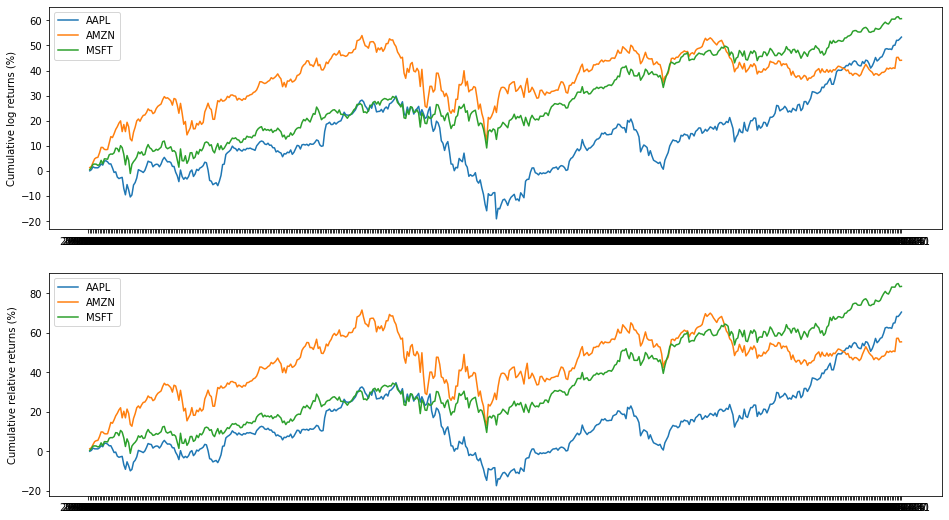

In [39]:
plt.figure(figsize=(16, 9))
plt.subplot(211)

for ticker in cumulative_log_returns:
    plt.plot(cumulative_log_returns[ticker].index, 100*cumulative_log_returns[ticker], label=str(ticker))

plt.ylabel('Cumulative log returns (%)')
plt.legend()

plt.subplot(212)

for ticker in cumulative_relative_returns:
    plt.plot(cumulative_relative_returns[ticker].index, 100*cumulative_relative_returns[ticker], label=str(ticker))

plt.ylabel('Cumulative relative returns (%)')
plt.legend()

plt.show()


Great! Now we have the ability to dissect any stock price ticker into its daily returns and then calculate the **cumulative** return over a defined time period!

## Defining a Trading Strategy
In defining a trading strategy, we want to derive a set of weights which we will apply to different assets in our portfolio and compare returns over a period of time. So given a certain amount of dollars $N$ we want to figure out $w_1(t)$ and $w_2(t)$ where the sum of those two is less than or equal to 1. 

For example, assume we can invest in 2 assets only and that $N=\$1000$. If $w_1(t)=0.4$ and $w_2(t)=0.6$, this means that we have invested $w_1(t)N=\$400$ in asset 1 and $w_2(t)N=\$600$ in asset 2. 

Note - We won't go into short selling here but you can also have negative weights representing **short positions**. 

### Equal Weights Strategy
Let us look at how to calculate the return of our trading strategy for using **equal weights**.

First, let us look at just a single day, the last day, of our *log_returns* timeseries:

In [32]:
last_day = log_returns.tail(1)
last_day

Symbols,AAPL,AMZN,MSFT
date,,,
2019-12-31,0.00728,0.000514,0.000698


Then let us create equal weights for all 3 stocks (i.e. a weighting of $1/3$) using the same index and columns as our `last_day` vector:

In [33]:
weights_vector = pd.DataFrame([[1/3, 1/3, 1/3]], index=last_day.index, columns=last_day.columns)
weights_vector

Symbols,AAPL,AMZN,MSFT
date,,,
2019-12-31,0.333333,0.333333,0.333333


So what we want to do is multiply the weight of each stock times the return for that stock to determine how much we would actually get for a single day. In order to do this multiplication we simply do:

In [34]:
weights_vector*last_day

Symbols,AAPL,AMZN,MSFT
date,,,
2019-12-31,0.002427,0.000171,0.000233


And if we want the sum across all stocks, just sum up all the columns (pass the `axis=1` parameter in the `sum()` function - see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [35]:
(weights_vector*last_day).sum(axis=1)

date
2019-12-31    0.002831
dtype: float64

So this is the portfolio return on a single day, from the previous day, using our $1/3$ weighting strategy for the 3 specific stocks we have picked. 

Now, let us do this for the entire period between our start and end dates:

In [36]:
equal_weights = pd.DataFrame([[1/3,1/3,1/3]], index=log_returns.index, columns=log_returns.columns)
equal_strategy_log_returns = (equal_weights*log_returns).sum(axis=1)
equal_strategy_log_returns.tail()

date
2019-12-24   -0.000452
2019-12-26    0.023772
2019-12-27    0.000666
2019-12-30   -0.005022
2019-12-31    0.002831
dtype: float64

And then calculate the cumulative return for the entire timeseris:

In [37]:
cumulative_equal_log_returns = equal_strategy_log_returns.cumsum()
cumulative_equal_relative_returns = np.exp(cumulative_equal_log_returns)-1
cumulative_equal_relative_returns.tail()

date
2019-12-24    0.656693
2019-12-26    0.696547
2019-12-27    0.697677
2019-12-30    0.689173
2019-12-31    0.693961
dtype: float64

### Equal vs. Custom Weights Strategy
Let us look at how to calculate the return of our trading strategy for using custom weights and then plot and compare the two. Let's say we are friends with Jeff Bezos so we invested more with AMZN:

In [38]:
custom_weights = pd.DataFrame([[1/5,3/5,1/5]], index=log_returns.index, columns=log_returns.columns)
custom_strategy_log_returns =(custom_weights*log_returns).sum(axis=1)

cumulative_custom_log_returns = custom_strategy_log_returns.cumsum()
cumulative_custom_relative_returns = np.exp(cumulative_custom_log_returns)-1
cumulative_custom_relative_returns.tail()

date
2019-12-24    0.594173
2019-12-26    0.645462
2019-12-27    0.646482
2019-12-30    0.633453
2019-12-31    0.636566
dtype: float64

Let us now plot the two relative_returns series to compare performance:

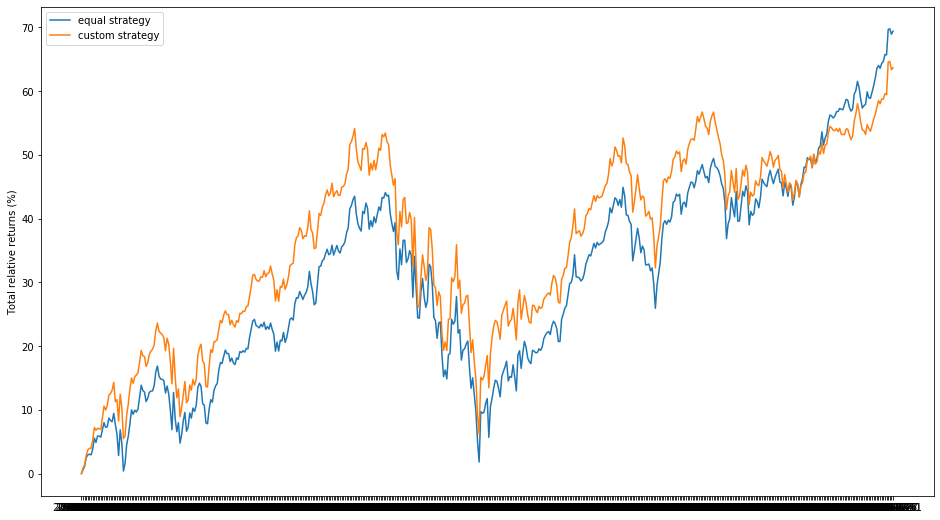

In [40]:
plt.figure(figsize=(16, 9))
plt.plot(cumulative_equal_relative_returns.index, 100*cumulative_equal_relative_returns, label='equal strategy')
plt.plot(cumulative_custom_relative_returns.index, 100*cumulative_custom_relative_returns, label='custom strategy')
plt.ylabel('Total relative returns (%)')
plt.legend()

plt.show()

So we see that over the course of our selected time period, the custom (AMZN-heavy) strategy tends to perform better except of late and the relative returns are nearly identical.

Let us write a quick function to calculate and print out some basic yearly statistics:

In [41]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

First our equal weights strategy statistics:

In [42]:
print_portfolio_yearly_statistics(cumulative_equal_relative_returns)

Total portfolio return is: 69.40%
Average yearly return is: 31.32%


In [43]:
print_portfolio_yearly_statistics(cumulative_custom_relative_returns)

Total portfolio return is: 63.66%
Average yearly return is: 29.00%


### Exercise

You have the following 5 ETF stock tickers for their corresponding sectors:
* IAU - Gold Trust
* IXC - Global Energy
* IXG - Global Financials
* IXJ - Global Healthcare
* IXN - Global Tech

> Come up with best weightings using at least 2 of these 5 ETFs which produce the greatest average yearly returns since Jan 1, 2016.

## Trading Strategy using Moving Averages

One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price. This helps remove the daily price 'noise' and allows us to observe the longer-term behaviour of the asset. 

Earlier, we created short-term and long-term moving averages for just the AMZN ticker:



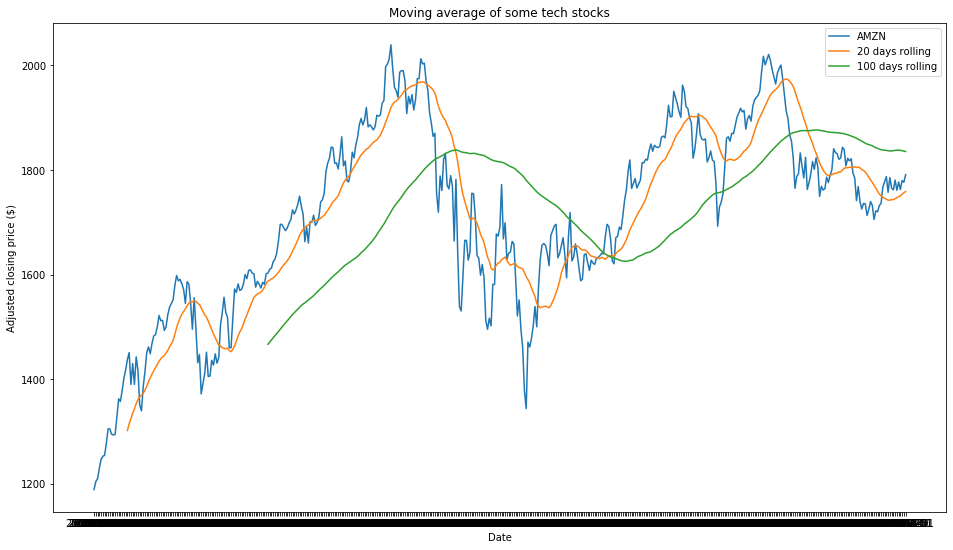

In [54]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn_data.index, amzn_data, label='AMZN')
ax.plot(short_rolling_amzn.index, short_rolling_amzn, label='20 days rolling')
ax.plot(long_rolling_amzn.index, long_rolling_amzn, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.set_title('Moving average of some tech stocks')
ax.legend()
plt.show()

The Simple Moving Average (SMA) timeseries, as plotted above, are less noisy but lag the original price timeseries, which means changes in the trend are only seen with a delay (or lag) of some number of days - let's call this $L$. For a moving average calculated using $M$ days, the lag $L$ is roughly $\frac M 2$. 

So if we are using a 100 days SMA, this means we may be late by almost 50 days, which can significantly affect our strategy.

One way to reduce the lag induced by the use of the SMA is to use the so-called **Exponential Moving Average (EMA)**, defined as:

>$ EMA(t) = (1-\alpha)EMA(t-1) + \alpha p(t)$

with a starting condition:

>$EMA(t_0) = p(t_0)$

where $p(t)$ is the price at time $t$ and $\alpha$ is called the *decay parameter* for the $EMA$. 

$\alpha$ is related to the window $M$ as:

>$ \alpha = \frac 2 {M+1}$

So as $M$ gets larger, $\alpha$ gets smaller. The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by $\frac 1 M$.

So take $M_1$ = 20 days, $M_2$ = 100 days, $t_0$ = yesterday and $t_1$ = today. 

With $M_1$ = 20 days:

> $EMA(t_1) = 0.905EMA(t_0) + 0.095p(t_1)$


With $M_1$ = 100 days:

> $EMA(t_1) = 0.98EMA(t_0) + 0.02p(t_1)$

The weighting given to the most recent price $p(t_1)$ is greater for a shorter-period EMA ($0.095$) than for a longer-period EMA ($0.02$) and both weightings are higher than what the SMA would have used:

$M_1$ = 20 days:

EMA weighting on $p(t_1)$: $0.095$
SMA weighting on $p(t_1)$: $0.05$

$M_1$ = 100 days:

EMA weighting on $p(t_1)$: $0.02$
SMA weighting on $p(t_1)$: $0.01$

Using Pandas, calculating the exponential moving average is easy. Let's compare the 20 day SMA vs EMA:

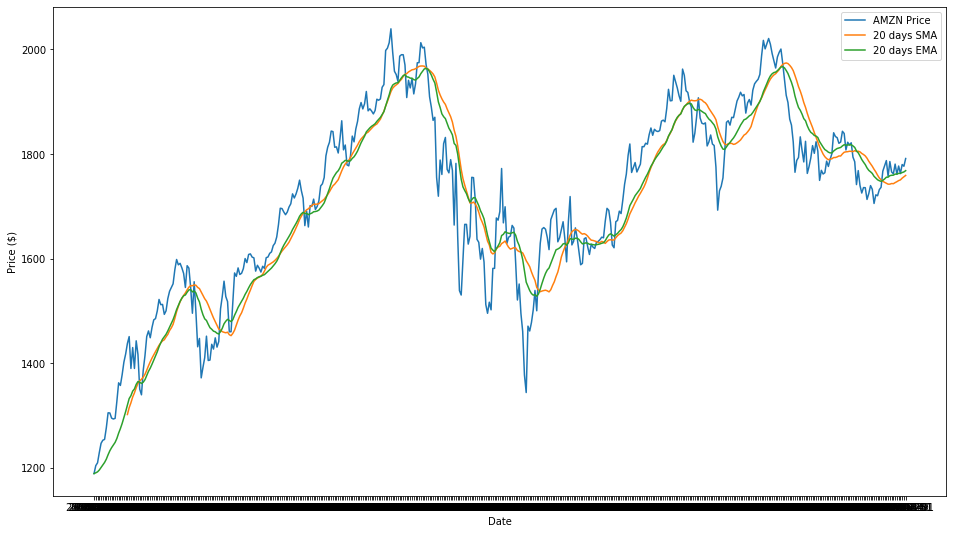

In [56]:
# Calculate the EMA using the .ewm() method:
ema_amzn_short = amzn_data.ewm(span=20, adjust=False).mean()

# Plot EMA and SMA
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn_data.index, amzn_data, label='AMZN Price')
ax.plot(short_rolling_amzn.index, short_rolling_amzn, label='20 days SMA')
ax.plot(ema_amzn_short.index, ema_amzn_short, label='20 days EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()

Note the EMA curve smooths out the price fluctuations just like the SMA curve, but is more responsive to price trend changes and **does not have a 20 day lag!**

### MA Strategy Implementation

Here, we are going to take advantage of the fact that a moving average timeseries (whether SMA or EMA) lags the actual price behaviour. Our strategy will be to use the crossing of the moving average an actual price timeseries as potential trading signals:

1. When the price timeseries $p(t)$ crosses the EMA timeseries $e(t)$ from below, we will buy (go long) one unit of the asset.

2. When the price timeseries $p(t)$ crosses the EMA timeseries $e(t)$ from above, we will sell one unit of the asset.

Like the last exercise, we will assume our funds are equally split across all 3 assets with a weighting of $w_i(t) = \frac 1 3$ when we are holding the asset and a weighting of $w_i(t) = 0$ when we have sold the asset.

*Advanced - if you are familiar with the concept of short selling, you can use a weighting of $w_i(t) = -\frac 1 3$ in your strategy.*

So to implement the above strategy in Python using Pandas, we simply take the *sign** of the difference between the price $p_i(t)$ and the EMA $e_i(t)$:

In [60]:
ema_short = close_data.ewm(span=20, adjust=False).mean()

trading_positions_raw = close_data - ema_short

trading_positions_raw[trading_positions_raw <= 0] = 0

trading_positions = trading_positions_raw.apply(np.sign)*1/3

trading_positions.head()

Symbols,AAPL,AMZN,MSFT
date,,,
2018-01-02,0.000000,0.000000,0.000000
2018-01-03,0.000000,0.333333,0.333333
2018-01-04,0.333333,0.333333,0.333333
2018-01-05,0.333333,0.333333,0.333333
2018-01-08,0.333333,0.333333,0.333333


where $0$ represents days we are not holding the particular stock, and the $0.33..$ represents days we are holding the particular stock.

Now note that because we are using the **closing stock price** in our analysis, determining whether we are holding a stock or not impacts our action on the **following day**. So our position on $t_0$ is determined by the closing price on day $t_0 - 1$. So this means we need to **lag our trading signals by one day:**

In [61]:
trading_positions_final = trading_positions.shift(1)

And as before, we use the `log_returns` data to then calculate the overall portfolio relative return using our moving average strategy:

In [66]:
ema_strategy_log_returns = (trading_positions_final * log_returns).sum(axis=1)

cumulative_ema_strategy_log_returns = ema_strategy_log_returns.cumsum()
cumulative_ema_strategy_relative_returns = np.exp(cumulative_ema_strategy_log_returns) - 1

And as before, let us plot the cumulative returns and compare with our simple *buy-and-hold* strategy regardless of price trends:

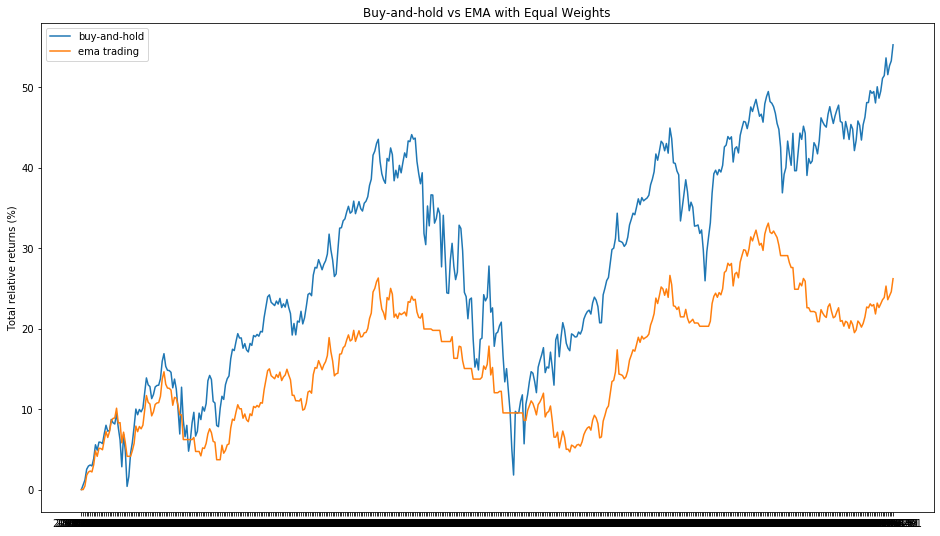

In [67]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(cumulative_equal_relative_returns.index, 100*cumulative_equal_relative_returns, label='buy-and-hold')
ax.plot(cumulative_ema_strategy_relative_returns.index, 100*cumulative_ema_strategy_relative_returns, label='ema trading')
ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.set_title('Buy-and-hold vs EMA with Equal Weights')
plt.show()

Looks like buy-and-hold is the clear winner in this timeframe! Let's calcualte the portfolio and average yearly returns:

In [68]:
print_portfolio_yearly_statistics(cumulative_ema_strategy_relative_returns)

Total portfolio return is: 26.19%
Average yearly return is: 13.96%


Compared with:

In [69]:
print_portfolio_yearly_statistics(cumulative_equal_relative_returns)

Total portfolio return is: 55.24%
Average yearly return is: 28.02%


* How do these returns compare if we look at a longer timeframe, say since 2015? (Note - IEX limits data timeframes to 5 years with the free account)